## Importing data from CSV files and labels

In the first tutorial, we saw how to add randomly generated points to a domain. In this example, we'll find some real data from the scientific literature, visualise it in MuSpAn, and explore the key concept of metadata using <i>labels</i>.

Let's get started by loading some data. We'll grab the data used in the paper [Extended correlation functions for spatial analysis of multiplex imaging data](https://doi.org/10.1017/S2633903X24000011), which shows the locations of 6 different types of cell in a 1mm square image of mouse colorectal carcinoma. A CSV containing this data is stored within MuSpAn for use as an example here, so it can be easily loaded using the [pandas](https://pandas.pydata.org/) library:

In [1]:
# Import necessary libraries
import pandas as pd
import os
import muspan as ms

# Load the dataset
# The dataset is stored within MuSpAn for use as an example
# We read the CSV file into a pandas DataFrame
df = pd.read_csv(os.path.dirname(ms.datasets.__file__) + '/data/Bull_2024_mouse_colon.csv')

# Display the first 5 rows of the dataframe to understand its structure
print(df.head())

       x      y      Cell type  CD4 intensity
0  15.00   2.00  T Helper Cell       4.461036
1  36.75   6.75  T Helper Cell       9.262379
2  11.75   8.25  T Helper Cell       6.959003
3  65.75   9.00  T Helper Cell      16.364574
4  22.25  10.75  T Helper Cell       4.528144


Printing the first few rows of the dataframe, we can see that the cell locations are stored in the ```x``` and ```y``` columns. Let's store these columns in a ```numpy``` array:

In [2]:
# Import numpy library
import numpy as np

# Extract 'x' and 'y' columns from the dataframe and convert them to a numpy array
points = np.asarray([df['x'], df['y']])

# Print the shape of the resulting numpy array
print(np.shape(points))

(2, 6676)


Note that stacking the x and y columns together has generated a (2 x 6676) numpy array. In order to add this to a MuSpAn domain, we need it to be (n x 2) dimensional, so we'll have to transpose the array to add the points. Let's make a MuSpAn domain, add the (transposed) array of points, and take a first look.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

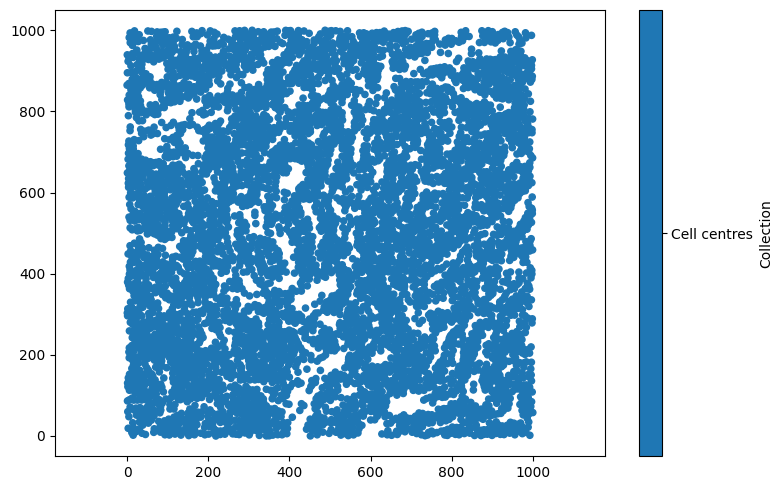

In [3]:
# Create a MuSpAn domain for the mouse cells
domain = ms.domain('Mouse cells')

# Add the transposed array of points to the domain with the label 'Cell centres'
domain.add_points(points.T, 'Cell centres')

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a figure for visualisation
plt.figure(figsize=(8, 5))

# Visualise the domain
ms.visualise.visualise(domain, ax=plt.gca())

Metadata can be linked with MuSpAn objects using <i>labels</i>. In this case, let's add a label to each cell centre describing its cell type. Adding labels is a straightforward process, we just call ```domain.add_labels('Celltype',celltype_array)```, to add an array of labels with the name "Celltype" to the domain.

In [4]:
# Extract the 'Cell type' column from the dataframe
celltype_array = df['Cell type']

# Add the cell type labels to the domain
domain.add_labels('Celltype', celltype_array)

# Print the domain to verify the labels have been added
print(domain)

Domain name: Mouse cells
Number of objects: 6676
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


We can see that the list of available Labels now contains 'Celltype'. In addition, if we want to print out these labels to our terminal, we can use the `print_labels()` function of `domain`.

In [5]:
domain.print_labels()

                Celltype
object_id               
0          T Helper Cell
1          T Helper Cell
2          T Helper Cell
3          T Helper Cell
4          T Helper Cell
...                  ...
6671          Epithelium
6672          Epithelium
6673          Epithelium
6674          Epithelium
6675          Epithelium

[6676 rows x 1 columns]


If we want to see what these labels look like, we can add an argument to the command ```ms.visualise.visualise(domain, 'Celltype')```, which MuSpAn will interpret as wanting to colour the objects in ```domain``` using a label called ```celltype```:

(<Figure size 800x500 with 2 Axes>, <Axes: >)

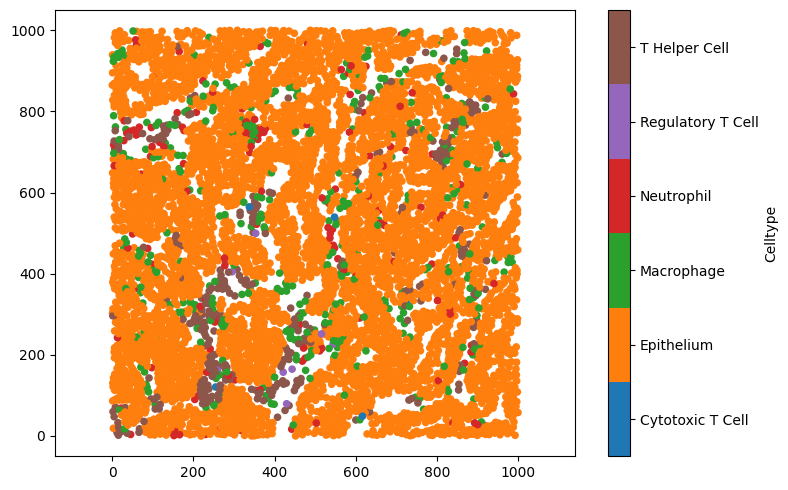

In [6]:
# Create a new figure for visualisation
plt.figure(figsize=(8, 5))

# Visualise the domain, colouring objects by the 'Celltype' label
ms.visualise.visualise(domain, 'Celltype', ax=plt.gca())

By default, MuSpAn will try to select a sensible colour palette for visualisation, but there are many ways to customise visualisation in MuSpAn (see the tutorials on visualisation for examples). For now, let's manually change some of the colors associated with this label to something with a bit less orange in it. We can do that by passing a dictionary of the colours we'd like to update to ```domain.update_colors```. Let's make the epithelium grey, and use the orange colour for T Helper Cells. MuSpAn uses ```pyplot``` for plotting, so we can specify colours in any way that ```matplotlib``` recognises. While we're here, we'll also use slightly smaller markers so that nearby points don't overlap.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

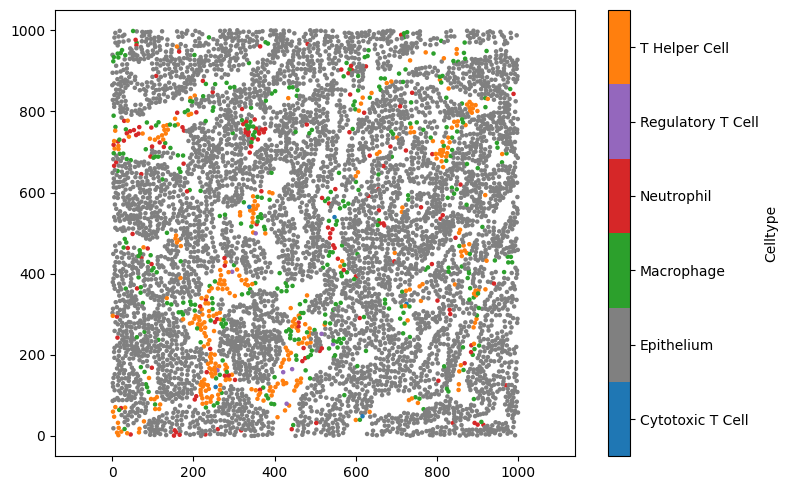

In [7]:
# Define new colors for specific cell types
new_colors = {'Epithelium': 'grey', 'T Helper Cell': plt.cm.tab10(1)}

# Update the colors in the domain for the 'Celltype' label
domain.update_colors(new_colors, label_name='Celltype')

# Create a new figure for visualisation
plt.figure(figsize=(8, 5))

# Visualise the domain, colouring objects by the 'Celltype' label with updated colors and smaller markers
ms.visualise.visualise(domain, 'Celltype', ax=plt.gca(), marker_size=5)

We may also want to show just certain cell types, for instance, only the Regulatory T Cells. We can do that by passing a tuple ```(label_name,label_value)``` as the keyword argument ```objects_to_plot```.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

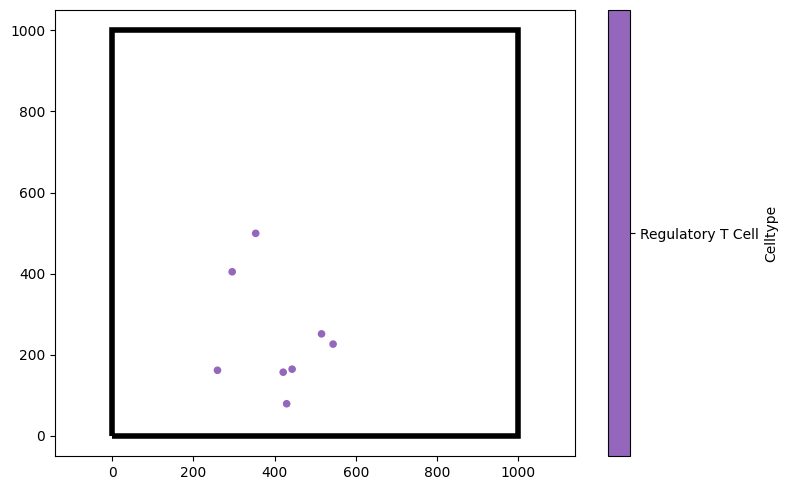

In [8]:
# Create a new figure for visualisation
plt.figure(figsize=(8, 5))

# Visualise the domain, showing only the 'Regulatory T Cell' type
# The 'show_boundary' argument is set to True to display the boundary of the domain
ms.visualise.visualise(domain, 'Celltype', objects_to_plot=('Celltype', 'Regulatory T Cell'), ax=plt.gca(), show_boundary=True)

'Celltype' here is an example of a <i>categorical</i> label, in which the label takes distinct values. We can also assign <i>continuous</i> labels, such as the 'CD4 intensity' label included with this dataset (which describes the average expression of the marker CD4, found on T Helper Cells).

(<Figure size 800x500 with 2 Axes>, <Axes: >)

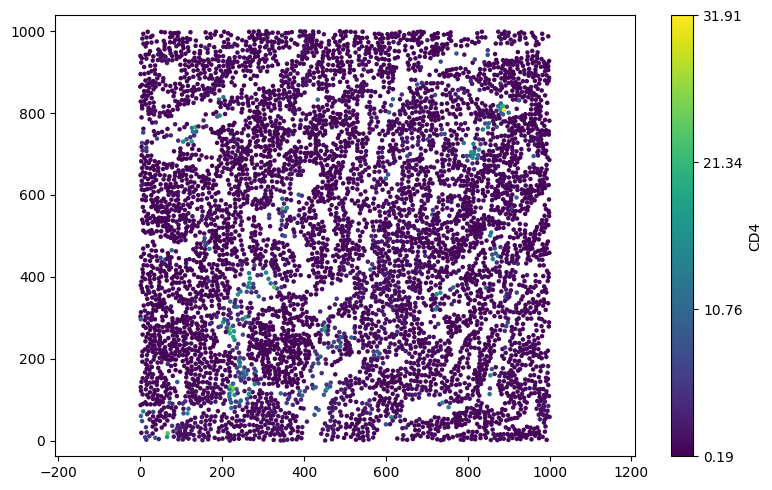

In [9]:
# Extract the 'CD4 intensity' column from the dataframe
CD4_intensity = df['CD4 intensity']

# Add the CD4 intensity labels to the domain with a colormap 'viridis'
domain.add_labels('CD4', CD4_intensity, cmap='viridis')

# Create a new figure for visualisation
plt.figure(figsize=(8, 5))

# Visualise the domain, colouring objects by the 'CD4' label with smaller markers
ms.visualise.visualise(domain, 'CD4', ax=plt.gca(), marker_size=5)